# Pandas. Problem Set

## Daniel Dimitrov

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# pip install pydataset
from pydataset import data
from datetime import datetime

In [6]:
s3 = pd.Series({"lions":2, "tigers":1, "bears":3}, name="oh my")
s3[1:]
s3[np.array([len(i) == 5 for i in s3.index])]

lions    2
bears    3
Name: oh my, dtype: int64

### Pandas 1 / Problem 1

In [91]:
# set a list of even numbers
idx = list(range(52))
idx_even = idx[::2]
# set the series
s1 = pd.Series( (idx_even[i]**2-1 for i in range(len(idx_even))),index = idx_even)
# set the modulus 3 to zero 
s1[s1%3 ==0] = 0
    
print(s1.tail())
print(s1.describe())

42    1763
44       0
46       0
48    2303
50       0
dtype: int64
count      26.000000
mean      282.115385
std       609.410097
min        -1.000000
25%         0.000000
50%         0.000000
75%       116.000000
max      2303.000000
dtype: float64


### Pandas 1 / Problem 2

In [86]:
def rw(p,d):
    # p : probability of going up
    # d : dollar amount
    
    dates = pd.date_range(start='1/1/2000', end='12/31/2000')
    value = np.zeros(len(dates))
    value[0] = d
    for i in range(1,len(dates)):
        ind = np.random.binomial(1,p)
        value[i] = value[i-1] + ind - (1 - ind)
        
    s1 = pd.Series(value, dates)
    s1.plot()
    plt.title('Random Walk')


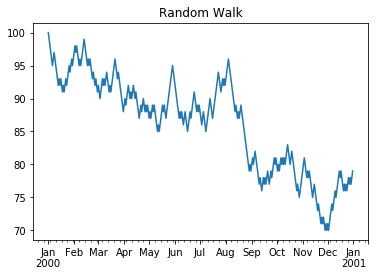

In [87]:
rw(.5,100)

### Pandas 1 / Problem 3

In [93]:
#build toy data for SQL operations
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', ' Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

In [101]:
studentInfo[(studentInfo['Age'] > 19)&(studentInfo['Sex'].isin(['M']))][['ID','Name']]

,ID,Name
0,0,Mylan
6,6,Matt


### Pandas 1 / Problem 4

In [104]:
pd.merge(studentInfo[studentInfo['Sex'].isin(['M'])],otherInfo, on='ID', how='outer')[['ID', 'Age','GPA']]

,ID,Age,GPA
0,0,20.0,3.8
1,2,18.0,3.0
2,4,19.0,2.8
3,6,20.0,3.8
4,7,19.0,3.4
5,1,NaN,3.5
6,3,NaN,3.9
7,5,NaN,2.9
8,8,NaN,3.7


### Pandas 2 / Problem 1

In [126]:
# data("bfeed",show_doc = True)

In [58]:
bfeed = data("bfeed")
bfeed.head()

,duration,delta,race,poverty,smoke,alcohol,agemth,ybirth,yschool,pc3mth
1,16,1,1,0,0,1,24,82,14,0
2,1,1,1,0,1,0,26,85,12,0
3,4,0,1,0,0,0,25,85,12,0
4,3,1,1,0,1,1,21,85,9,0
5,36,1,1,0,1,0,22,82,12,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA506C4358>,
      dtype=object)

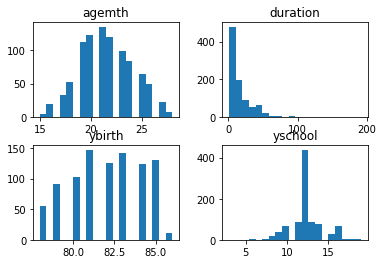

In [60]:
bfeed[["duration","ybirth","yschool","agemth"]].hist(grid=False, bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA50441CC0>,
      dtype=object)

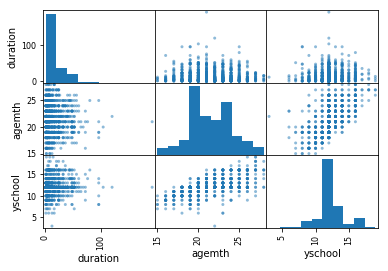

In [51]:
pd.plotting.scatter_matrix(bfeed[["duration", "ybirth", "poverty"]])

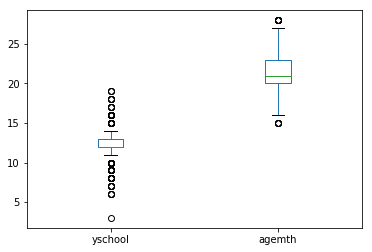

In [107]:
bfeed.plot(kind="box", y=["yschool", "agemth"])

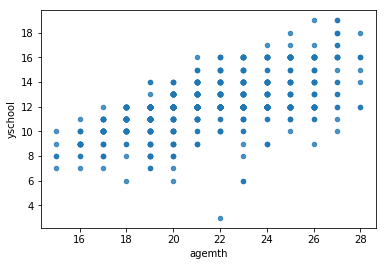

In [119]:
bfeed.plot(kind="scatter", x="agemth", y="yschool", alpha=.8)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA54751CF8>,
      dtype=object)

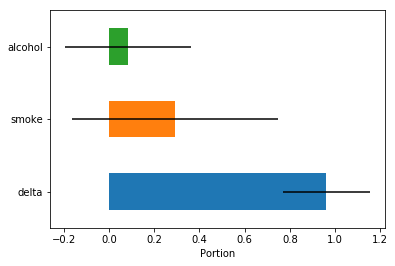

<Figure size 432x288 with 0 Axes>

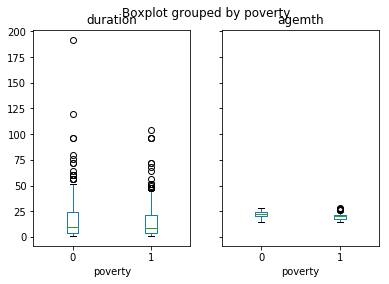

In [164]:
plt.figure()
bfeed[["delta", "smoke", "alcohol"]].mean().plot(kind="barh",
xerr=bfeed.std())
plt.xlabel("Portion")

plt.figure()
bfeed.boxplot(["duration", "agemth"], by="poverty", grid=False)

In [129]:
#data("Arbuthnot",show_doc = True)
Arbuthnot = data("Arbuthnot")

In [109]:
print(Arbuthnot.describe())
print(data("Arbuthnot").head())

              Year        Males      Females        Plague     Mortality  \
count    82.000000    82.000000    82.000000     82.000000     82.000000   
mean   1669.500000  5907.097561  5534.646341   1240.695122  17816.475610   
std      23.815261  1652.753629  1592.137490   7644.999175  10105.994029   
min    1629.000000  2890.000000  2722.000000      0.000000   8393.000000   
25%    1649.250000  4759.250000  4457.000000      0.000000  12738.750000   
50%    1669.500000  6073.000000  5718.000000      3.000000  17867.000000   
75%    1689.750000  7576.500000  7150.250000     22.250000  21029.500000   
max    1710.000000  8426.000000  7779.000000  68596.000000  97306.000000   

           Ratio      Total  
count  82.000000  82.000000  
mean    1.070748  11.441744  
std     0.031254   3.241638  
min     1.010673   5.612000  
25%     1.048469   9.198750  
50%     1.064704  11.813000  
75%     1.087510  14.723000  
max     1.156075  16.145000  
   Year  Males  Females  Plague  Mortality   

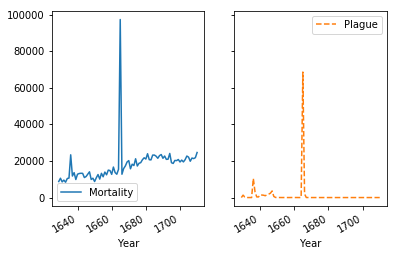

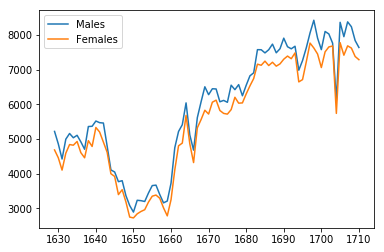

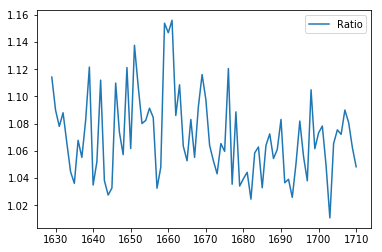

In [47]:
Arbuthnot.plot(x = 'Year', y=[ "Mortality", "Plague"],
... subplots=True, layout=(1,2), sharey=True,
... style=['-', '--', '-.', ':'])

plt.figure()
plt.plot(Arbuthnot.Year, Arbuthnot.Males, label='Males')
plt.plot(Arbuthnot.Year, Arbuthnot.Females, label='Females')
plt.legend()

plt.figure()
plt.plot(Arbuthnot.Year, Arbuthnot.Ratio, label='Ratio')
plt.legend()


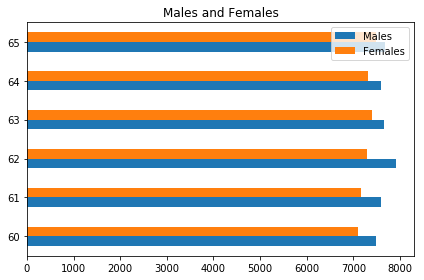

In [92]:
Arbuthnot.set_index('Year')
#crime.loc[1980:1985, ["Property", "Larceny", "Burglary"]].plot(kind="barh", title="Crime rates from 1980 to 1985")
Arbuthnot.loc[60:65,["Males", "Females"]].plot(kind="barh", title="Males and Females")
plt.tight_layout()

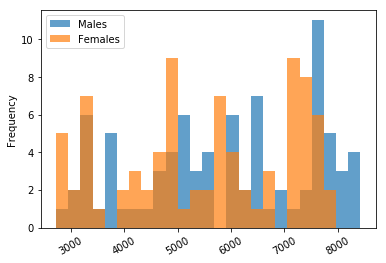

In [98]:
Arbuthnot.plot(kind="hist", y=["Males", "Females"],bins=25, alpha=.7, rot=30)

Text(0.5, 1.0, 'Number of Christlings vs. Plague Mortality')

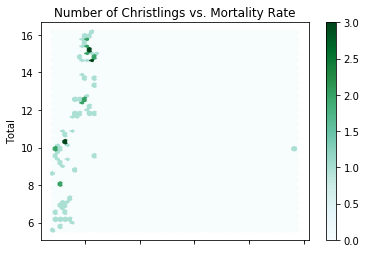

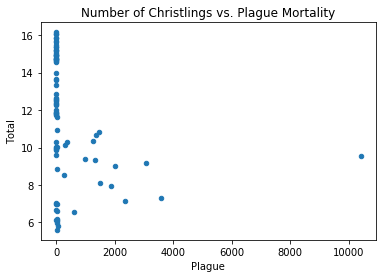

In [145]:

# with outlier
Arbuthnot.plot(kind="Hexbin", x="Mortality", y="Total",gridsize=50)
plt.title('Number of Christlings vs. Mortality Rate')
# without outlier 
Arbuthnot.drop(37, axis=0).plot(kind="scatter", x="Plague", y="Total")
plt.title('Number of Christlings vs. Plague Mortality')

### Pandas 3 / Problem 1

In [143]:
iris = data("iris")
iris.sample(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
71,5.9,3.2,4.8,1.8,versicolor
49,5.3,3.7,1.5,0.2,setosa
86,6.0,3.4,4.5,1.6,versicolor
30,4.7,3.2,1.6,0.2,setosa
90,5.5,2.5,4.0,1.3,versicolor


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA54790C50>,
      dtype=object)

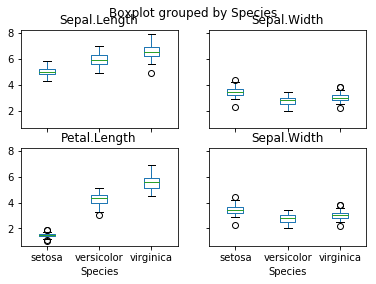

In [166]:
iris.boxplot(["Sepal.Length",'Sepal.Width','Petal.Length', "Sepal.Width"], by="Species", grid=False)

+ Virginica is the tallest

In [169]:
poisons = data("poisons")
poisons.sample(5)

,time,poison,treat
37,0.45,1,D
22,0.37,3,B
21,0.30,3,B
7,0.40,2,A
14,1.10,1,B


<Figure size 432x288 with 0 Axes>

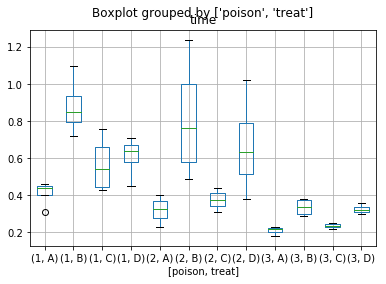

<Figure size 432x288 with 0 Axes>

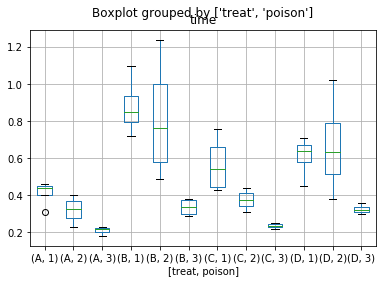

<Figure size 432x288 with 0 Axes>

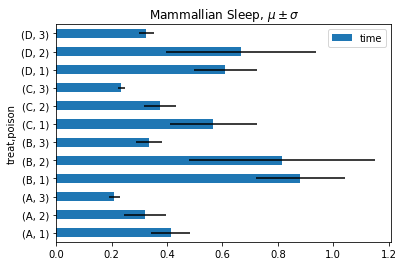

In [183]:
plt.figure()
poisons.boxplot(["time"], by=["poison", "treat"])
plt.figure()
poisons.boxplot(["time"], by=["treat","poison"])

# create the grouping
treatP = poisons.groupby(["treat","poison"])
plt.figure()
treatP[["time"]].mean().plot(kind="barh",
xerr=treatP.std(), title=r"Mammallian Sleep, $\mu\pm\sigma$")


+ Poison 3 is the deadliest considering all treatment options 
+ Treatment B seems to be the most effective

In [186]:
diamonds = data("diamonds")
diamonds.sample(5)


,carat,cut,color,clarity,depth,table,price,x,y,z
48488,0.50,Premium,D,VS2,61.3,61.0,1980,5.10,5.04,3.11
3602,0.91,Ideal,G,SI2,62.2,57.0,3425,6.18,6.24,3.86
45656,0.25,Very Good,E,VVS2,63.1,55.0,526,3.98,4.04,2.53
6469,0.90,Very Good,E,SI1,62.2,60.0,4054,6.14,6.17,3.83
24487,1.51,Premium,G,VS2,62.5,59.0,12756,7.28,7.34,4.57


<Figure size 432x288 with 0 Axes>

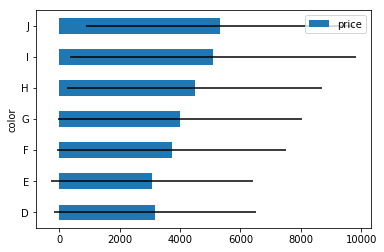

<Figure size 432x288 with 0 Axes>

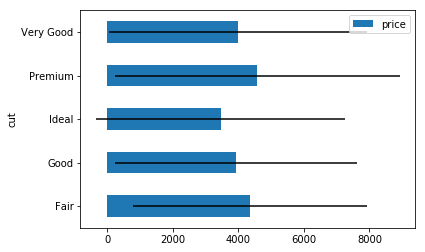

In [188]:
diamondsByColor = diamonds.groupby("color")
diamondsByCut = diamonds.groupby("cut")

plt.figure()
diamondsByColor[["price"]].mean().plot(kind="barh",
xerr=diamondsByColor.std())

plt.figure()
diamondsByCut[["price"]].mean().plot(kind="barh",
xerr=diamondsByCut.std())


+ J color are most expensive
+ Premium cut are most expensive

### Pandas 3 / Problem 2

In [4]:
titanic = pd.read_csv("titanic.csv")
titanic.sample(5)


,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,home.dest
84,1.0,0.0,"Cumings, Mr. John Bradley",male,39.0,1.0,0.0,PC 17599,71.2833,C85,C,NaN,NaN,"New York, NY"
1019,3.0,0.0,"Mineff, Mr. Ivan",male,24.0,0.0,0.0,349233,7.8958,NaN,S,NaN,NaN,NaN
157,1.0,0.0,"Hilliard, Mr. Herbert Henry",male,NaN,0.0,0.0,17463,51.8625,E46,S,NaN,NaN,"Brighton, MA"
310,1.0,0.0,"Wick, Mr. George Dennick",male,57.0,1.0,1.0,36928,164.8667,NaN,S,NaN,NaN,"Youngstown, OH"
348,2.0,0.0,"Bracken, Mr. James H",male,27.0,0.0,0.0,220367,13.0000,NaN,S,NaN,NaN,"Lake Arthur, Chavez County, NM"


Text(0.5, 1.0, 'Average survival rate per embarment city')

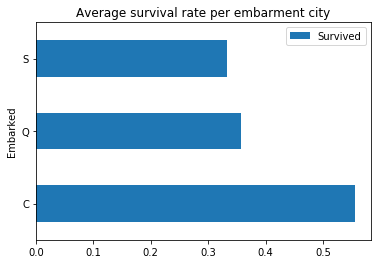

In [9]:
titanicByEmbarked = titanic.groupby("Embarked")

titanicByEmbarked[["Survived"]].mean().plot(kind="barh")
plt.title('Average survival rate per embarment city')

In [13]:
titanic.pivot_table(values="Survived", index=["Embarked"], columns="Sex")


Sex,female,male
Embarked,,
C,0.902655,0.305732
Q,0.616667,0.111111
S,0.680412,0.170144


+ Women had a higher chance of surviva. Women were saved from the ship with priority 

+ People from Q had a much lower chance of surviving. Maybe lower class passangers

In [14]:
titanic.pivot_table(values="Survived", index=["Embarked","Pclass"], columns="Sex")


Sex                female      male
Embarked Pclass                    
C        1.0     0.971831  0.400000
         2.0     1.000000  0.294118
         3.0     0.709677  0.214286
Q        1.0     1.000000  0.000000
         2.0     1.000000  0.000000
         3.0     0.589286  0.122807
S        1.0     0.956522  0.305556
         2.0     0.870968  0.134228
         3.0     0.395349  0.144809

### Pandas 4 / Problem 1

Text(0.5, 1.0, 'DJIA')

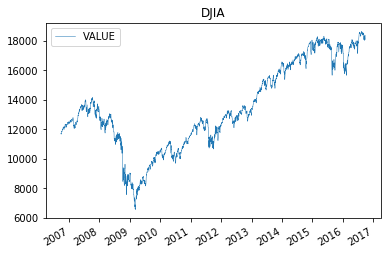

In [10]:
data = pd.read_csv("DJIA.csv")
data['DATE'] = pd.to_datetime(data['DATE'])
data.index = data['DATE'].values
data.drop(columns=['DATE'], inplace=True)
data.VALUE.dropna()
data = data[data.VALUE != '.']
data['VALUE']=pd.to_numeric(data['VALUE'])
data.plot(lw=.5)
plt.title('DJIA')

### Pandas 4 / Problem 2

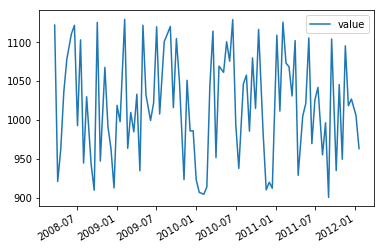

In [16]:
paychecks = pd.read_csv('paychecks.csv', header=None)

idx1 = pd.date_range(start='13/03/2008', periods=93, freq="WOM-1FRI" )
idx2 = pd.date_range(start='13/03/2008', periods=93, freq="WOM-3FRI" )

date_idx = pd.DatetimeIndex.union(idx1,idx2)[0:93]

paychecks = paychecks.set_index(date_idx)
paychecks.columns = ['value']

paychecks.plot()

In [17]:
### Pandas 4 / Problem 5

Largest daily gain: 11.08 %
Largest daily loss: -7.87 %
Largest monthly gain: 9.39 %
Largest monthly los: -12.54 %


Text(0.5, 1.0, 'Monthly Returns')

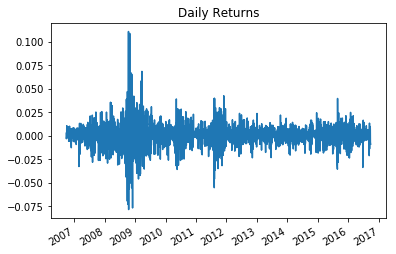

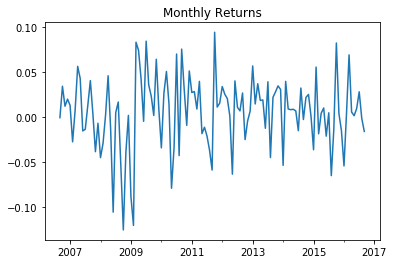

In [70]:
data['Rt'] = data.VALUE.pct_change()

# The single day with the largest gain.
largestGain = max(data.Rt.dropna())
print('Largest daily gain:', round(largestGain*100,2),'%')
# The single day with the largest loss.
largestDrop = min(data.Rt.dropna())
print('Largest daily loss:', round(largestDrop*100,2),'%')

data.Rt.plot()
plt.title('Daily Returns')

# resample
dataMo = data.Rt.resample("M").sum()

# The month with the largest gain.
largestGain = max(dataMo.dropna())
print('Largest monthly gain:', round(largestGain*100,2),'%')

# The month with the largest loss.
largestDrop = min(dataMo.dropna())
print('Largest monthly los:', round(largestDrop*100,2),'%')

plt.figure()
dataMo.plot()
plt.title('Monthly Returns')



### Pandas 4 / Problem 6

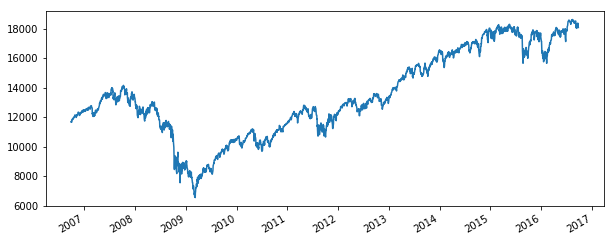

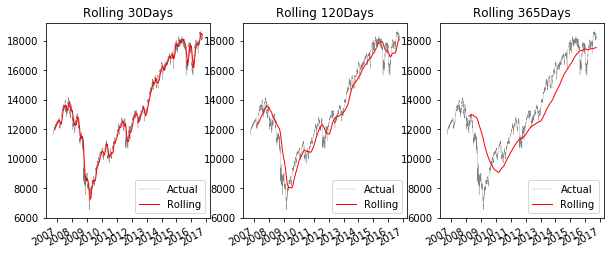

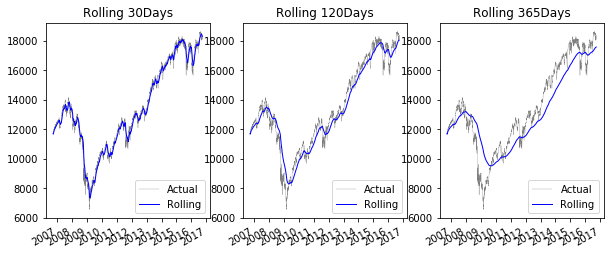

In [126]:
# Plot the following from the DJIA dataset with a window or span of 30, 120, and 365.

# The original data points.
Windows = np.array([-30, -120, -365])
plt.figure(figsize=(10,4))

data.VALUE.plot()


# Rolling average.
plt.figure(figsize=(10,4))
for iW, Wdw in enumerate(Windows):
    
    ax1 = plt.subplot(1,3,iW+1)
    data.VALUE.plot(color="gray", lw=.3, ax=ax1)
    data.VALUE.rolling(window=-Wdw).mean().plot(color='r', lw=1, ax=ax1)
    ax1.set_title('Rolling '+ str(-Wdw) + 'Days' )
    ax1.legend(["Actual", "Rolling"], loc="lower right")
    
# Exponential average.
plt.figure(figsize=(10,4))
for iW, Wdw in enumerate(Windows):
    
    ax1 = plt.subplot(1,3,iW+1)
    data.VALUE.plot(color="gray", lw=.3, ax=ax1)
    data.VALUE.ewm(span=-Wdw).mean().plot(color='b', lw=1, ax=ax1)
    ax1.set_title('Rolling '+ str(-Wdw) + 'Days' )
    ax1.legend(["Actual", "Rolling"], loc="lower right")

# Minimum rolling values.

# Maximum rolling values.
#Describe how varying the length of the window changes the approximation to the data.

+ The longer the time window, the smoother the rolling average 
